In [ ]:
%cd /content/drive/MyDrive/랭체인 AI 영상객체탐지분석 플랫폼 구축/11.멀티모달/과제/축구/data

/content/drive/MyDrive/랭체인 AI 영상객체탐지분석 플랫폼 구축/11.멀티모달/과제/축구/data


In [ ]:
!unzip -q fittogether.zip

In [ ]:
%cd /content/drive/MyDrive/랭체인 AI 영상객체탐지분석 플랫폼 구축/11.멀티모달/과제/축구

/content/drive/MyDrive/랭체인 AI 영상객체탐지분석 플랫폼 구축/11.멀티모달/과제/축구


In [1]:
!pip install ultralytics opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 73.8 MB/s eta 0:00:00


In [2]:
import os
import random
import shutil
import cv2
import glob
import json
import yaml
import ultralytics
import matplotlib.pyplot as plt
from torchvision import transforms
from tqdm import tqdm
from ultralytics import YOLO
from ultralytics.utils.plotting import Annotator

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
ultralytics.checks()

Ultralytics 8.3.249 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.6/112.6 GB disk)


In [3]:
from os.path import exists
data_root = '/content/drive/MyDrive/랭체인 AI 영상객체탐지분석 플랫폼 구축/11.멀티모달/과제/축구'
file_root = f'{data_root}/data'
pjt_name = 'soccer_detect'

train_root = f'{data_root}/{pjt_name}/train'
valid_root = f'{data_root}/{pjt_name}/valid'
test_root = f'{data_root}/{pjt_name}/test'



In [ ]:
for folder in [train_root, valid_root, test_root]:
    if not os.path.exists(folder):
        os.makedirs(folder)
    for s in ['images', 'labels']:
        s_folder = f'{folder}/{s}'
        if not os.path.exists(s_folder):
            os.makedirs(s_folder)

In [4]:
file_list = glob.glob(f'{file_root}/*.json')
file_list

[]

In [ ]:
def json_to_yolo_bbox(bbox, w, h):
    # xcenter = (xmin + xmax) /2
    # ycenter = (ymin + ymax) /2
    x_center = ((bbox[0][0]+ bbox[1][0]) / 2) / w
    y_center = ((bbox[0][1]+ bbox[1][1]) / 2) / h
    width = (bbox[1][0] - bbox[0][0]) / w
    height = (bbox[1][1] - bbox[0][1]) / h
    return [x_center, y_center, width, height]

In [ ]:
file = file_list[1]
result = set()

with open(file,'r') as f:
    json_data = json.load(f)
    width, height = int(json_data['imageWidth']), int(json_data['imageHeight'])
    print(width, height)

    if json_data.get('shapes'):
        for b in json_data['shapes']:
            yolo_bbox = json_to_yolo_bbox(b['points'], width, height)
            bbox_string = " ".join([str(x) for x in yolo_bbox])
            cls = int()
            if b['label'] == 'players':
                cls = 0
            elif b['label'] == 'ball':
                cls = 1
            else:
                cls = 2 # 알수없음
            result.add(f'{cls} {bbox_string}')

result = list(result)
print(result)
if result:
    with open(file.replace('json', 'txt'), 'w', encoding='utf-8') as t:
        t.write('\n'.join(result))
        print(file)

3840 2160
['0 0.8557478533648771 0.47883882833543245 0.008144102034301071 0.041231975516655195', '0 0.9415339508319669 0.45340360469358193 0.008894925730545821 0.042109311323632846', '2 0.9240439283280845 0.4333261693367443 0.011693329331167016 0.03926648861823994', '0 0.797181593594741 0.553851786501131 0.010648033966256184 0.04394426716232713', '2 0.5762658270187229 0.3157993179821298 0.008480583240083916 0.03049844487968469', '0 0.748369474741011 0.7882076063366473 0.013820209724581289 0.05583923121042923', '0 0.9817110310980279 0.3691849820463162 0.009294697673491706 0.03606831307467286', '0 0.6148995951124385 0.591203518631362 0.009611327672095153 0.04992027270212376', '0 0.8229058766830756 0.44555423741263644 0.009383421909086209 0.039500862040765077', '0 0.6821788888171044 0.36656229147180514 0.008103668429413584 0.03752396337340842', '1 0.8477304604375566 0.4935094288980142 0.003947381317790999 0.007017566787184103', '0 0.944993367640735 0.6383989260320957 0.010051061617877248 

In [ ]:
for file in tqdm(file_list):
    result = set()
    with open(file, 'r') as f:
        json_data = json.load(f)
        width, height = int(json_data['imageWidth']), int(json_data['imageHeight'])

        if json_data.get('shapes'):
            for b in json_data['shapes']:
                yolo_bbox = json_to_yolo_bbox(b['points'], width, height)
                bbox_string = " ".join([str(x) for x in yolo_bbox])
                cls = int()
                if b['label'] == 'players':
                    cls = 0
                elif b['label'] == 'ball':
                    cls = 1
                else:
                    cls = 2 # other
                result.add(f'{cls} {bbox_string}')

        result = list(result)
    if result:
        with open(file.replace('json', 'txt'), 'w', encoding='utf-8') as t:
            t.write('\n'.join(result))

100%|██████████| 11150/11150 [14:48<00:00, 12.55it/s]


In [5]:
random.seed(2026)
file_list = glob.glob(f'{file_root}/*.txt')
random.shuffle(file_list)
test_ratio = 0.2
num_file = len(file_list)
num_file

11150

In [6]:
test_list = file_list[:int(num_file * test_ratio)]
valid_list = file_list[int(num_file * test_ratio):int(num_file*test_ratio)*2]
train_list = file_list[int(num_file*test_ratio)*2:]

In [ ]:
# 테스트 데이터
for i in tqdm(test_list):
    txt_name = i.split("/")[-1] # 파일이름 가져오기
    shutil.copyfile(i, f'{test_root}/labels/{txt_name}')
    img_path = i.replace('txt', 'jpg')
    img_name = img_path.split('/')[-1]
    shutil.copyfile(img_path, f'{test_root}/images/{img_name}')


100%|██████████| 2230/2230 [03:04<00:00, 12.10it/s]


In [ ]:
# 검증 데이터
for i in tqdm(valid_list):
    txt_name = i.split("/")[-1] # 파일이름 가져오기
    shutil.copyfile(i, f'{valid_root}/labels/{txt_name}')
    img_path = i.replace('txt', 'jpg')
    img_name = img_path.split('/')[-1]
    shutil.copyfile(img_path, f'{valid_root}/images/{img_name}')

100%|██████████| 2230/2230 [03:10<00:00, 11.70it/s]


In [ ]:
# 학습 데이터
for i in tqdm(train_list):
    txt_name = i.split("/")[-1] # 파일이름 가져오기
    shutil.copyfile(i, f'{train_root}/labels/{txt_name}')
    img_path = i.replace('txt', 'jpg')
    img_name = img_path.split('/')[-1]
    shutil.copyfile(img_path, f'{train_root}/images/{img_name}')

100%|██████████| 6690/6690 [05:40<00:00, 19.64it/s]


In [7]:
pjt_root = '/content/drive/MyDrive/랭체인 AI 영상객체탐지분석 플랫폼 구축/11.멀티모달/과제/축구/soccer_detect'

In [8]:
data = dict()

data['train'] = train_root
data['val'] = valid_root
data['test'] = test_root
data['nc'] = 3
data['name'] = ['players','ball','others']

with open(f'{pjt_root}/soccer_detect.yaml', 'w') as f:
    yaml.dump(data, f)

In [9]:
%cd /content/drive/MyDrive/랭체인 AI 영상객체탐지분석 플랫폼 구축/11.멀티모달/과제/축구/soccer_detect

/content/drive/MyDrive/랭체인 AI 영상객체탐지분석 플랫폼 구축/11.멀티모달/과제/축구/soccer_detect


In [ ]:
model = YOLO('yolov8s.pt')
results = model.train(data='soccer_detect.yaml', epochs=30, batch=8, imgsz=224, device=0, workers=2, amp=False, name='soccerdetect_s')

Ultralytics 8.3.249 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=False, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=soccer_detect.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=soccerdetect_s2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0

In [ ]:
model = YOLO('yolov8n.pt')
results = model.train(data='soccer_detect.yaml', epochs=30, batch=8, imgsz=224, device=0, workers=2, amp=False, name='soccerdetect_n')

In [10]:
result_folder = '/content/drive/MyDrive/랭체인 AI 영상객체탐지분석 플랫폼 구축/11.멀티모달/과제/축구/soccer_detect/runs/detect/soccerdetect_s2'

model = YOLO(f'{result_folder}/weights/best.pt')

# val: 평가전용
# split='val' : yaml 안에 정의된 데이터셋 분할
metrics = model.val(split='val')

Ultralytics 8.3.250 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.8±0.1 ms, read: 0.4±0.1 MB/s, size: 324.9 KB)
val: Scanning /content/drive/MyDrive/랭체인 AI 영상객체탐지분석 플랫폼 구축/11.멀티모달/과제/축구/soccer_detect/valid/labels.cache... 2230 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 2230/2230 2.8Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 140/140 1.2s/it 2:47
                   all       2230      40366      0.517      0.197      0.289      0.118
               class_0       2230      34532      0.851      0.319       0.52      0.213
               class_1       1205       1205          0          0          0          0
               class_2       2228       4629      0.698      0.271      0.346      0.141
Speed: 0.2ms preprocess, 1.6ms inference

In [11]:
metrics.box.map

np.float64(0.11809262781763792)

In [12]:
metrics.box.map50

np.float64(0.2887106901608714)

In [16]:
test_file_list = glob.glob(f'{test_root}/images/*')
random.shuffle(test_file_list)
test_file_list

['/content/drive/MyDrive/랭체인 AI 영상객체탐지분석 플랫폼 구축/11.멀티모달/과제/축구/soccer_detect/test/images/video_12_000190.jpg',
 '/content/drive/MyDrive/랭체인 AI 영상객체탐지분석 플랫폼 구축/11.멀티모달/과제/축구/soccer_detect/test/images/video_35_000260.jpg',
 '/content/drive/MyDrive/랭체인 AI 영상객체탐지분석 플랫폼 구축/11.멀티모달/과제/축구/soccer_detect/test/images/video_31_000454.jpg',
 '/content/drive/MyDrive/랭체인 AI 영상객체탐지분석 플랫폼 구축/11.멀티모달/과제/축구/soccer_detect/test/images/video_12_000215.jpg',
 '/content/drive/MyDrive/랭체인 AI 영상객체탐지분석 플랫폼 구축/11.멀티모달/과제/축구/soccer_detect/test/images/video_30_001411.jpg',
 '/content/drive/MyDrive/랭체인 AI 영상객체탐지분석 플랫폼 구축/11.멀티모달/과제/축구/soccer_detect/test/images/video_05_000199.jpg',
 '/content/drive/MyDrive/랭체인 AI 영상객체탐지분석 플랫폼 구축/11.멀티모달/과제/축구/socce


0: 128x224 5 class_0s, 10.3ms
Speed: 1.3ms preprocess, 10.3ms inference, 2.0ms postprocess per image at shape (1, 3, 128, 224)


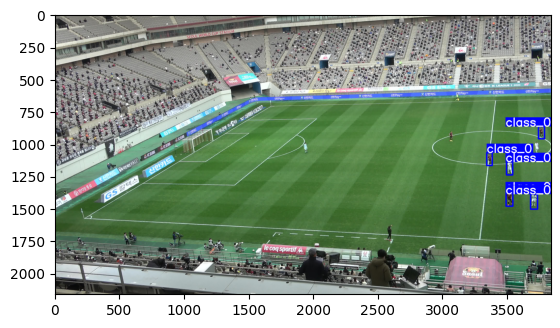

In [20]:
test_img = cv2.imread(test_file_list[2])
img_src = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
results = model(img_src)[0]
color_dict = [(0,0,255),(0,255,0),(255,255,0)]

annotator = Annotator(img_src)
boxes = results.boxes
for box in boxes:
    b = box.xyxy[0]
    cls = box.cls
    annotator.box_label(b, model.names[int(cls)], color_dict[int(cls)])
img_src = annotator.result()
plt.imshow(img_src)
plt.show()


0: 128x224 1 class_0, 1 class_2, 16.8ms
Speed: 1.0ms preprocess, 16.8ms inference, 2.3ms postprocess per image at shape (1, 3, 128, 224)

0: 128x224 1 class_0, 19.4ms
Speed: 3.7ms preprocess, 19.4ms inference, 4.2ms postprocess per image at shape (1, 3, 128, 224)

0: 128x224 5 class_0s, 16.8ms
Speed: 1.0ms preprocess, 16.8ms inference, 2.4ms postprocess per image at shape (1, 3, 128, 224)

0: 128x224 3 class_0s, 1 class_2, 8.8ms
Speed: 0.9ms preprocess, 8.8ms inference, 1.6ms postprocess per image at shape (1, 3, 128, 224)

0: 128x224 1 class_0, 1 class_2, 20.5ms
Speed: 0.9ms preprocess, 20.5ms inference, 4.3ms postprocess per image at shape (1, 3, 128, 224)

0: 128x224 6 class_0s, 9.8ms
Speed: 1.0ms preprocess, 9.8ms inference, 1.8ms postprocess per image at shape (1, 3, 128, 224)


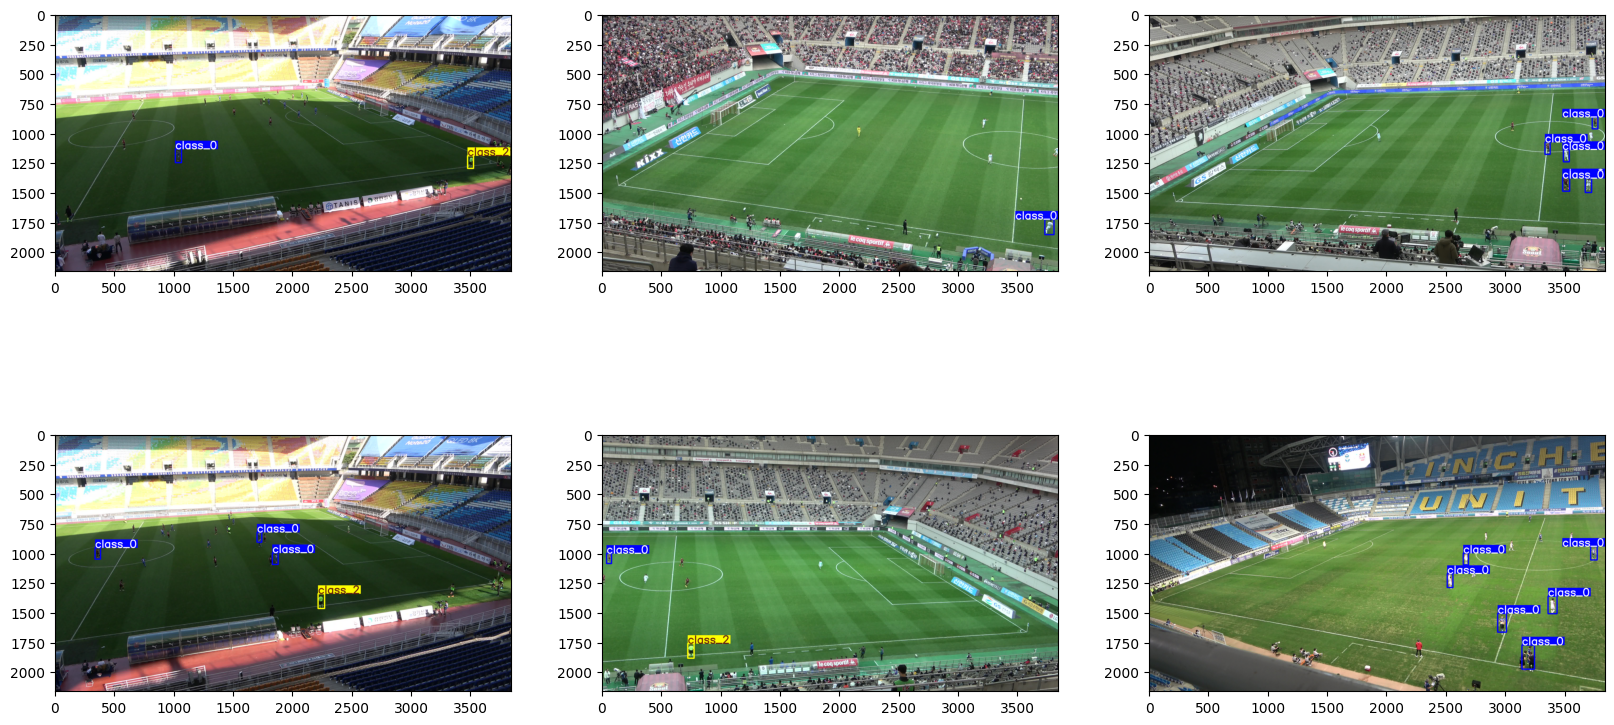

In [23]:
plt.figure(figsize = (20,10))
for idx in range(6):
    test_img = cv2.imread(test_file_list[idx])
    img_src = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
    results = model(test_img)

    for result in results:
        annotator = Annotator(img_src)
        boxes = result.boxes
        for box in boxes:
            b = box.xyxy[0]  # get box coordinates in (top, left, bottom, right) format
            cls = box.cls
            annotator.box_label(b, model.names[int(cls)], color_dict[int(cls)])
    img_src = annotator.result()

    plt.subplot(2, 3, (idx+1))
    plt.imshow(img_src)
plt.show()